In [21]:
import pandas as pd
%matplotlib inline

In [2]:
!ls

data-exploration.ipynb		ZayoHackathonData_Opportunities.csv
ZayoHackathonData_Accounts.csv	ZayoHackathonData_Services.csv
ZayoHackathonData_CPQs.csv	ZayoHackathonData_Sites.csv


In [3]:
accounts = pd.read_csv('ZayoHackathonData_Accounts.csv')
cpqs = pd.read_csv('ZayoHackathonData_CPQs.csv')
opportunities = pd.read_csv('ZayoHackathonData_Opportunities.csv')
services = pd.read_csv('ZayoHackathonData_Services.csv')
sites = pd.read_csv('ZayoHackathonData_Sites.csv')

In [13]:
accounts_dropna = accounts.dropna()

In [37]:
accounts_dropna.columns

Index(['Account ID', 'Industry', 'Vertical', ' Total BRR ', ' AnnualRevenue ',
       'NumberOfEmployees', ' DandB Revenue ', 'DandB Total Employees'],
      dtype='object')

In [38]:
accounts_dropna.head()

,Account ID,Industry,Vertical,Total BRR,AnnualRevenue,NumberOfEmployees,DandB Revenue,DandB Total Employees
0,Acct-000273,Telecommunications,Wireless,"$6,084,906.00","$248,747,365.62",397,"$356,943,618.45",397
1,Acct-000013,Telecommunications,National Carrier/ISP,"$5,117,529.00","$10,779,768,901.96",40000,"$10,779,768,901.96",40000
2,Acct-000036,Telecommunications,Wireless,"$5,105,015.00","$9,277,969,886.09",34518,"$19,094,310,655.17",34518
3,Acct-000025,Telecommunications,National Carrier/ISP,"$4,234,871.00","$6,248,394,000.00",10040,"$7,587,138,000.00",12500
4,Acct-000004,Telecommunications,Wireless,"$3,510,947.00","$29,669,960,000.00",30000,"$32,588,090,000.00",30000


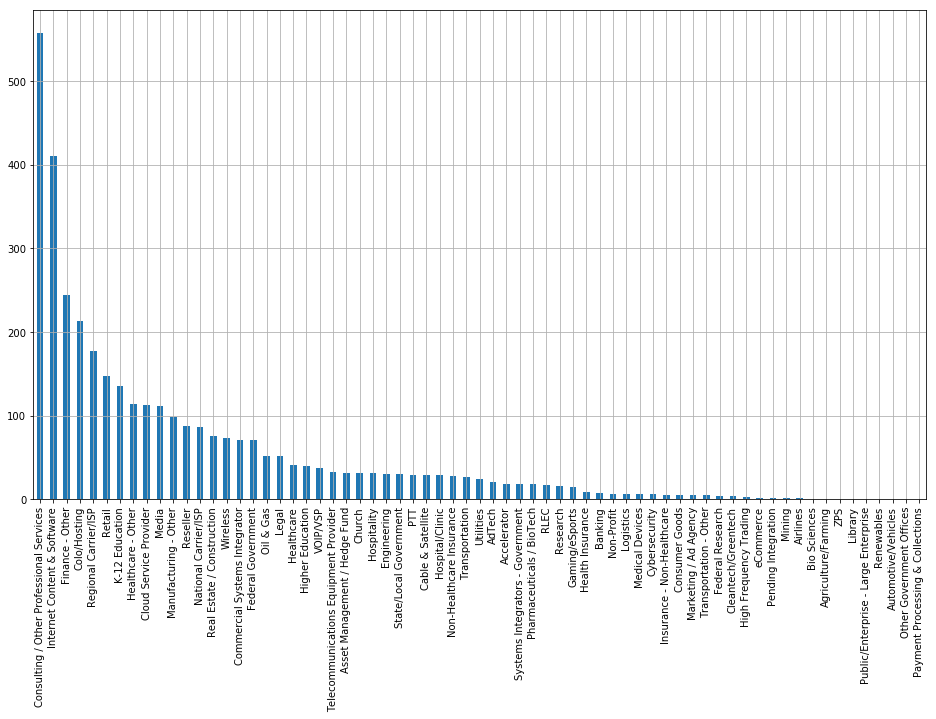

In [22]:
accounts_dropna.Vertical.value_counts().plot(kind='bar', grid=True, figsize=(16, 9))

In [24]:
cpqs_dropna = cpqs.dropna()

In [33]:
cpqs_dropna.columns

Index(['CPQ ID', 'Account ID', 'CreatedDate', 'Product Group',
       ' X36 MRC List ', ' X36 NRR List ', ' X36 NPV List ', 'Building ID',
       'Market', 'Street Address', 'City', 'State', 'Postal Code',
       'Network Proximity', 'On Zayo Network Status'],
      dtype='object')

In [39]:
cpqs_dropna.head()

,CPQ ID,Account ID,CreatedDate,Product Group,X36 MRC List,X36 NRR List,X36 NPV List,Building ID,Market,Street Address,City,State,Postal Code,Network Proximity,On Zayo Network Status
0,CPQ-000001,Acct-000001,10/4/16,Ethernet,"$1,621.68",$922.00,"$11,894.29",Bldg-108671,Denver,9706 E Easter Ave,Englewood,CO,80112,109.60,On Zayo Network
1,CPQ-000002,Acct-000002,10/4/16,Wavelengths - Metro,"$1,445.92","$2,766.00","$19,926.89",Bldg-015169,Denver,1425 Champa St,Denver,CO,80202,148.72,On Zayo Network
2,CPQ-000002,Acct-000002,10/4/16,Wavelengths - Metro,"$1,445.92","$2,766.00","$19,926.89",Bldg-111386,Denver,3431 N Windsor Dr,Aurora,CO,80011,779.17,On Zayo Network
3,CPQ-000003,Acct-000003,10/4/16,Ethernet,"$1,420.38",$922.00,"$28,437.18",Bldg-014866,Dallas,1950 N Stemmons Fwy,Dallas,TX,75207,239.80,On Zayo Network
4,CPQ-000004,Acct-000004,10/4/16,Ethernet,"$1,553.61","$1,613.50","$28,654.35",Bldg-038523,Atlanta,375 Riverside Pkwy,Lithia Springs,GA,30122,274.12,On Zayo Network


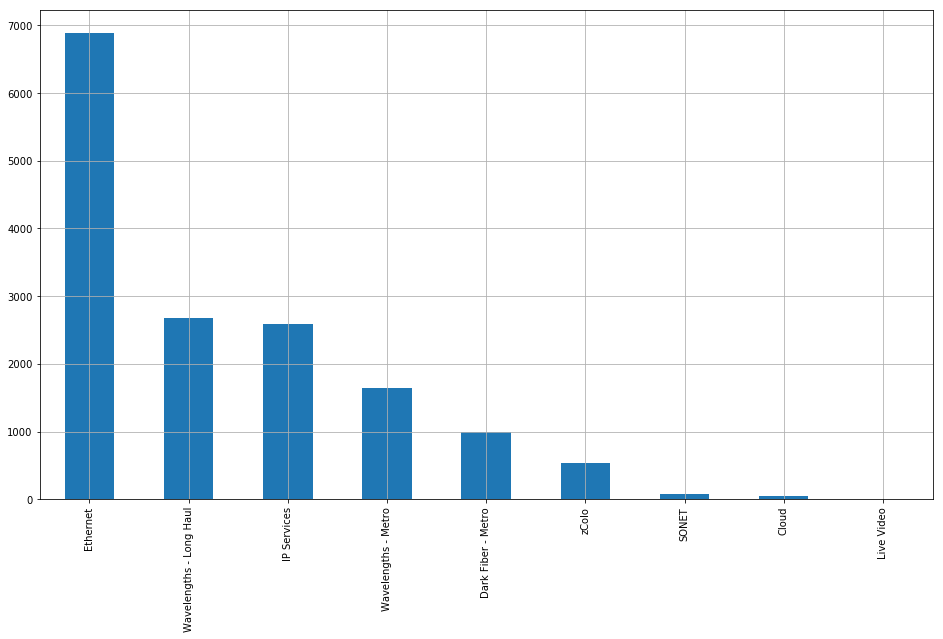

In [35]:
cpqs_dropna['Product Group'].value_counts().plot(kind='bar', grid=True, figsize=(16, 9))

In [43]:
opportunities.head()

,Opportunity ID,Account ID,StageName,IsClosed,IsWon,CreatedDate,Term in Months,Service,Opportunity Type,Product Group,Building ID,Market,Street Address,City,State,Postal Code,Network Proximity,On Zayo Network Status
0,Opp-000001,Acct-000007,Closed - Lost,True,False,7/1/16,12.0,NaN,New Service,Ethernet,Bldg-012582,Atlanta,56 Marietta St NW,Atlanta,GA,30303,66.45,On Zayo Network
1,Opp-000002,Acct-000986,5 - Accepted,True,True,7/1/16,60.0,NaN,New Service,Dark Fiber - Metro,Bldg-016855,Atlanta,300 Satellite Blvd NW,Suwanee,GA,30024,374.79,On Zayo Network
2,Opp-000002,Acct-000986,5 - Accepted,True,True,7/1/16,60.0,NaN,New Service,Dark Fiber - Metro,Bldg-109003,Atlanta,305 Satellite Blvd NW,Suwanee,GA,30024,250.74,On Zayo Network
3,Opp-000003,Acct-000011,5 - Accepted,True,True,7/1/16,36.0,NaN,New Service,Dark Fiber - Metro,Bldg-012582,Atlanta,56 Marietta St NW,Atlanta,GA,30303,66.45,On Zayo Network
4,Opp-000003,Acct-000011,5 - Accepted,True,True,7/1/16,36.0,NaN,New Service,Dark Fiber - Metro,Bldg-038069,Atlanta,1100 Abernathy Rd NE,Atlanta,GA,30328,151.21,On Zayo Network


In [47]:
opportunities = opportunities.drop('Service', axis=1)

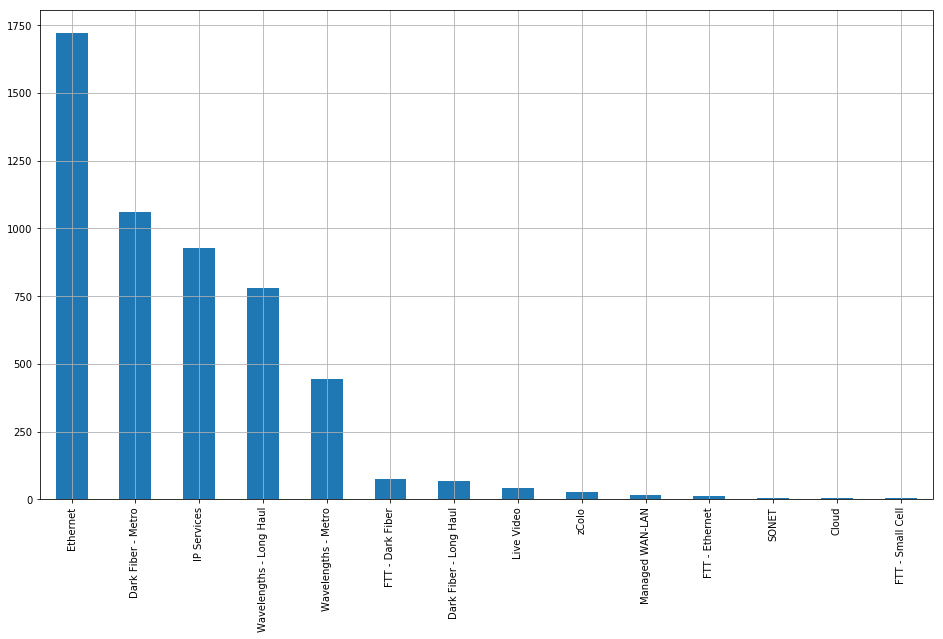

In [52]:
opportunities[opportunities['Opportunity Type'] == 'New Service']['Product Group'].value_counts()\
.plot(kind='bar', grid=True, figsize=(16, 9))